# **Playstore Dataset**

#### Mohammad Muttaqi

### **Contents**

* [Preprocessing The Dataset](#chapter1)
    * [*Obtaining and Cleaning The Data*](#section_1_1)
    * [*Changing The Data Type*](#section_1_2)

* [Sorting The Dataset](#chapter2)
    * [*Sorting The Dataset According To The Number of Installs*](#section_2_1)
    * [*Sorting The Dataset According To The Number of Installs and Rating*](#section_2_2)
    * [*Sorting The Dataset According To The Number of Installs, Rating, and Number Reviews*](#section_2_3)

* [Future Work](#chapter3)

# Preprocessing The Dataset <a class="anchor" id="chapter1"></a>

## Obtaining and cleaning the data <a class="anchor" id="section_1_1"></a>

importing necessary libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

importing the dataset

In [25]:
df = pd.read_csv('the_dataset/googleplaystore.csv')

checking the shape of the dataset

In [5]:
df.shape

(10841, 13)

obtaining information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


checking the first 5 rows of the dataset

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


dropping the unnecessary columns

In [26]:
df = df.drop(columns=['Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

checking the first 5 rows of the dataset

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


description of the integer data

In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


some info about the non-integer data

In [12]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
count,10841,10841,10841,10841,10841,10840,10841,10840
unique,9660,34,6002,462,22,3,93,6
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone
freq,9,1972,596,1695,1579,10039,10040,8714


dropping the rows with missing data

In [27]:
df = df.dropna()

checking the dataset

In [15]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+


removing the duplicate rows

In [29]:
df = df.drop_duplicates(subset='App', keep="first")

In [30]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+


## Changing the datatypes <a class="anchor" id="section_1_2"></a>

obtaining information about the data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
dtypes: float64(1), object(8)
memory usage: 640.3+ KB


In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


changing the type of reviews from str to int

In [35]:
df['Reviews'] = df['Reviews'].astype('int')

removing the charecters from the number of installs

In [36]:
c6 = df['Installs']
index_count = 0
for i in c6:
    i = i.replace('+', '')
    i = i.replace(',', '')
    c6.iloc[index_count]=i
    index_count += 1
    #print(c6[index_count])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5392\2834102716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c6.iloc[index_count]=i


changing the datatype to int

In [37]:
df['Installs'] = df['Installs'].astype('int')

removing the charecters from the size value

In [38]:
c5 = df['Size']
index_count = 0
for i in c5:
    if ('M' in i): 
        i = i.replace('M', '000')
        if ('.' in i):
            i = i.replace('.', '')
    
    elif ('k' in i):
        i = i.replace('k', '')
    
    i = i.replace('Varies with device', '0000')
    c5.iloc[index_count]=i
    index_count += 1
    #print(c6[index_count])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5392\1092048184.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c5.iloc[index_count]=i


changing the datatype to float

In [40]:
df['Size'] = df['Size'].astype('float')

removing the charecters from the price

In [42]:
c8 = df['Price']
index_count = 0
for i in c8:
    
    i = i.replace('$', '')
    c8.iloc[index_count]=i
    index_count += 1
    #print(c6[index_count])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5392\80993556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c8.iloc[index_count]=i


changing the datatype to float

In [43]:
df['Price'] = df['Price'].astype('float')

In [44]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,26000.0,500,Free,0.0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000.0,100,Free,0.0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int32  
 4   Size            8196 non-null   float64
 5   Installs        8196 non-null   int32  
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
dtypes: float64(3), int32(2), object(4)
memory usage: 576.3+ KB


description of the integer data

In [50]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,8.196000e+03,8196.000000,8.196000e+03,8196.000000
mean,4.173243,2.552515e+05,33814.429051,9.165090e+06,1.037884
std,0.536625,1.985594e+06,27041.044298,5.825087e+07,16.857882
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,14000.000000,1.000000e+04,0.000000
50%,4.300000,3.004000e+03,28000.000000,1.000000e+05,0.000000
75%,4.500000,4.381300e+04,51000.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


some info about the non-integer data

In [51]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,App,Category,Type,Content Rating
count,8196,8196,8196,8196
unique,8196,33,2,6
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Free,Everyone
freq,1,1608,7592,6618


exporting the data to a new csv file

In [52]:
df.to_csv('the_dataset/muttaqi_playstore.csv', index=False)

# Sorting The Dataset <a class="anchor" id="chapter2"></a>

## Sorting the data according to the number of installs <a class="anchor" id="section_2_1"></a>

reading the data from the cleaned-up dataset

In [31]:
df_sorted1 = pd.read_csv('the_dataset/muttaqi_playstore.csv')

sorting the data from high to low according to the number of installs

In [32]:
df_sorted1 = df_sorted1.sort_values(["Installs"], ascending=False)

observing the top installed apps

In [56]:
df_sorted1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
2834,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.0,1000000000,Free,0.0,Teen
2377,Google,TOOLS,4.4,8033493,0.0,1000000000,Free,0.0,Everyone
1872,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen
1873,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,Free,0.0,Teen
287,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone


we can see that all the top apps have over 1 billion installs.
and the top 3 apps are: Google News, Google, & Facebook

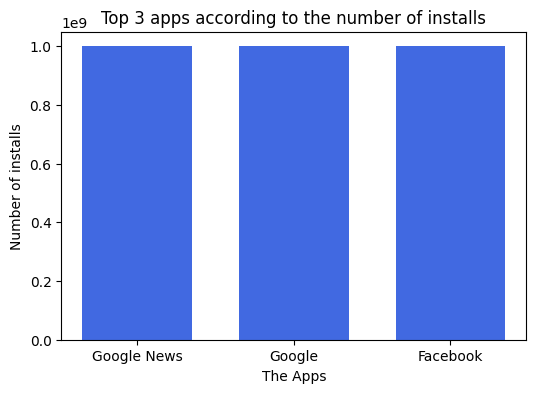

exporting the sorted data to a csv file

In [63]:
df_sorted1.to_csv('the_dataset/muttaqi_playstore_sorted(install).csv', index=False)

plotting the top 3 installed apps

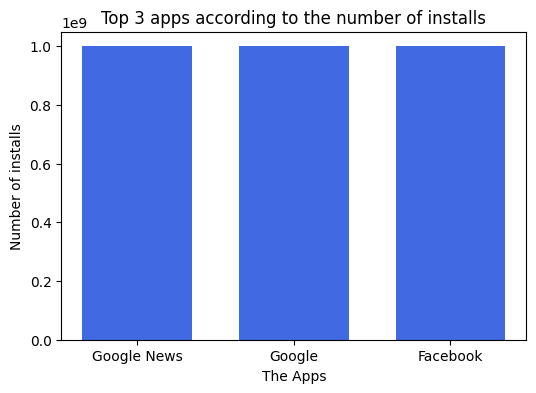

In [40]:
data = [[0,0,0], [0,0,0]]
counter1, counter2 = 0, 0

for i in df_sorted1['App']:
    if counter1<3:
        #apps = list(data.keys(i)) 
        data[0][counter1] = i
        counter1+=1
    else:
        break

for j in df_sorted1['Installs']:
    if counter2<3:
        #installs = list(data.values(j))
        data[1][counter2] = j
        counter2+=1
    else:
        break

apps = data[0][:]
installs = data[1][:]
fig = plt.figure(figsize = (6, 4))
plt.bar(apps, installs, color ='royalblue', width = 0.7)
plt.xlabel("The Apps")
plt.ylabel("Number of installs")
plt.title("Top 3 apps according to the number of installs")
plt.show()

## Sorting the data according to the number of installs and rating <a class="anchor" id="section_2_2"></a>

reading the data from the cleaned-up dataset

In [22]:
df_sorted2 = pd.read_csv('the_dataset/muttaqi_playstore.csv')

sorting the data from high to low according to the number of installs and the rating

In [23]:
df_sorted2 = df_sorted2.sort_values(["Installs", "Rating"], ascending=False)

observing the top installed apps

In [59]:
df_sorted2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1276,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+
1873,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,Free,0.0,Teen
2061,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.0,Everyone
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone
2377,Google,TOOLS,4.4,8033493,0.0,1000000000,Free,0.0,Everyone


we can see that all the top apps in addition to having over 1 billion installs the top 3 have all a rating of 4.5

and the top 3 apps are: Subway Surfers, Instagram, & Google Photos

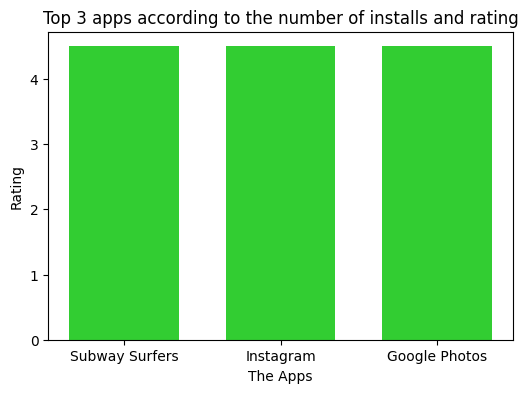

exporting the sorted data to a csv file

In [64]:
df_sorted2.to_csv('the_dataset/muttaqi_playstore_sorted(install+rating).csv', index=False)

plotting the top 3 installed apps

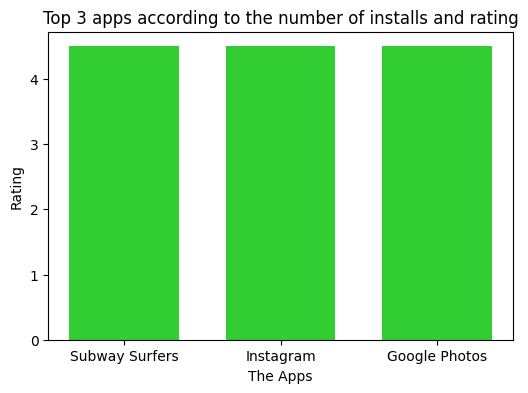

In [27]:
data = [[0,0,0], [0,0,0]]
counter1, counter2 = 0, 0

for i in df_sorted2['App']:
    if counter1<3:
        #apps = list(data.keys(i)) 
        data[0][counter1] = i
        counter1+=1
    else:
        break

for j in df_sorted2['Rating']:
    if counter2<3:
        #installs = list(data.values(j))
        data[1][counter2] = j
        counter2+=1
    else:
        break

apps = data[0][:]
installs = data[1][:]
fig = plt.figure(figsize = (6, 4))
plt.bar(apps, installs, color ='limegreen', width = 0.7)
plt.xlabel("The Apps")
plt.ylabel("Rating")
plt.title("Top 3 apps according to the number of installs and rating")
plt.show()

## Sorting the data according to the number of installs, rating, and number of reviews <a class="anchor" id="section_2_3"></a>

reading the data from the cleaned-up dataset

In [36]:
df_sorted3 = pd.read_csv('the_dataset/muttaqi_playstore.csv')

sorting the data from high to low according to the number of installs

In [37]:
df_sorted3 = df_sorted3.sort_values(["Installs", "Rating", "Reviews"], ascending=False)

observing the top installed apps

In [62]:
df_sorted3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1873,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,Free,0.0,Teen
1276,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+
2061,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.0,Everyone
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone
2377,Google,TOOLS,4.4,8033493,0.0,1000000000,Free,0.0,Everyone


The top 3 apps are still the same
but, the ranking has changed as follows: 

    1.Instagram (with 66,577,313 reviews)
    2.Subway Surfers (with 27,722,264 reviews)
    3.Google Photos (with 10,858,556)

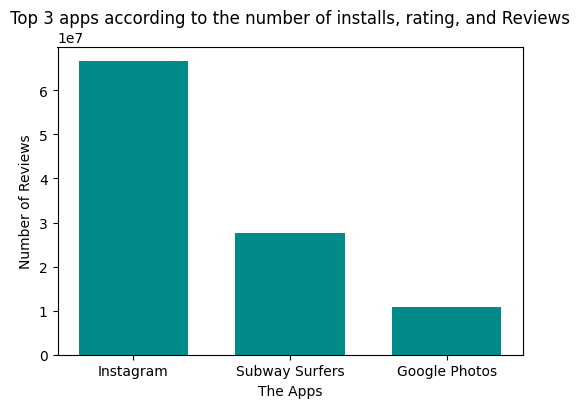

exporting the sorted data to a csv file

In [67]:
df_sorted3.to_csv('the_dataset/muttaqi_playstore_sorted(install+rating+review).csv', index=False)

plotting the top 3 installed apps

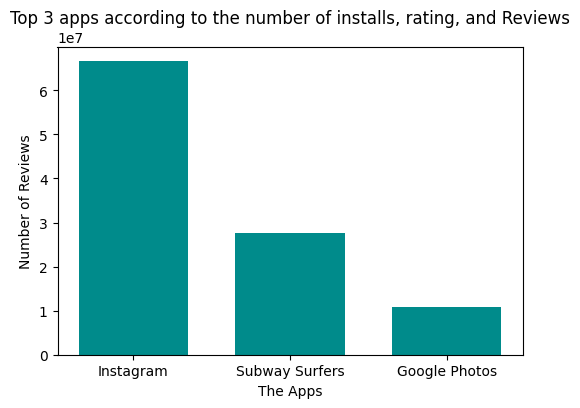

In [39]:
data = [[0,0,0], [0,0,0]]
counter1, counter2 = 0, 0

for i in df_sorted3['App']:
    if counter1<3:
        #apps = list(data.keys(i)) 
        data[0][counter1] = i
        counter1+=1
    else:
        break

for j in df_sorted3['Reviews']:
    if counter2<3:
        #installs = list(data.values(j))
        data[1][counter2] = j
        counter2+=1
    else:
        break

apps = data[0][:]
installs = data[1][:]
fig = plt.figure(figsize = (6, 4))
plt.bar(apps, installs, color ='darkcyan', width = 0.7)
plt.xlabel("The Apps")
plt.ylabel("Number of Reviews")
plt.title("Top 3 apps according to the number of installs, rating, and Reviews")
plt.show()

# Future work <a class="anchor" id="chapter3"></a>

* Feature importance can be evaluated and the missing data could be filled accordingly 
* Some of the features could be changed into numerical values
* Some of the features could be further categorized